<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display the first few rows to get an overview of the data
print(df.head())

# Display the column names
print("Column Names:")
print(df.columns)

# Display the data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary statistics for numerical columns
print("\nSummary Information (Numerical Columns):")
print(df.describe())

# Display summary information for all columns, including non-numeric ones
print("\nSummary Information (All Columns):")
print(df.info())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Identify missing values in the dataset
missing_values = df.isnull().sum()

# Display the number of missing values per column
print("Missing Values in Each Column:")
print(missing_values)

# Display columns with missing values
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])

# Fill missing values in numerical columns with the median
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# For other numerical columns, you can choose the mean or median as appropriate
# Convert 'YearsCodePro' to numeric, forcing non-numeric values to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

# Fill missing values in categorical columns with the most frequent value (mode)
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
# Remove rows with missing values (if necessary)
# Remove rows where specific columns have missing values
df = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])
##df=df.dropna()
# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation/Removal:")
print(missing_values_after)

print(df.head())

Missing Values in Each Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Columns with Missing Values:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Missing Values After Imputation/Removal:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11        25371
Surv

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
import pandas as pd

# Calculate value counts for the Employment column
employment_counts = df['Employment'].value_counts()
print("Employment Type Distribution:")
print(employment_counts)

# Calculate value counts for the JobSat column (Job Satisfaction)
job_sat_counts = df['JobSat'].value_counts()
print("\nJob Satisfaction Distribution:")
print(job_sat_counts)

# Calculate value counts for the YearsCodePro column (Years of Professional Coding Experience)
years_code_pro_counts = df['YearsCodePro'].value_counts()
print("\nYears of Professional Coding Experience Distribution:")
print(years_code_pro_counts)


Employment Type Distribution:
Employment
Employed, full-time                                                                                                                                                              39026
Independent contractor, freelancer, or self-employed                                                                                                                              4839
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                          3557
Employed, part-time                                                                                                                                                               1264
Student, full-time;Employed, part-time                                                                                                                                            1114
                                            

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


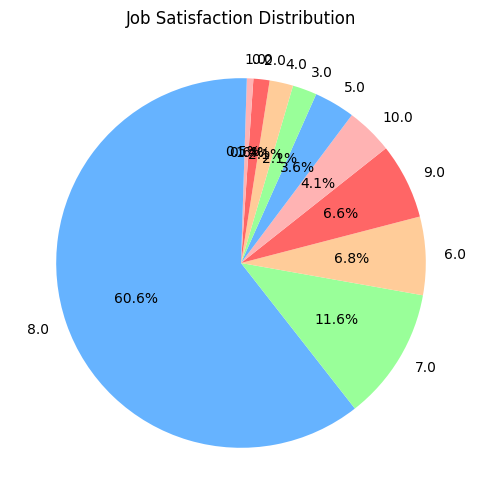

/tmp/ipykernel_84/3288804896.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat'].dropna(), shade=True, color='purple')


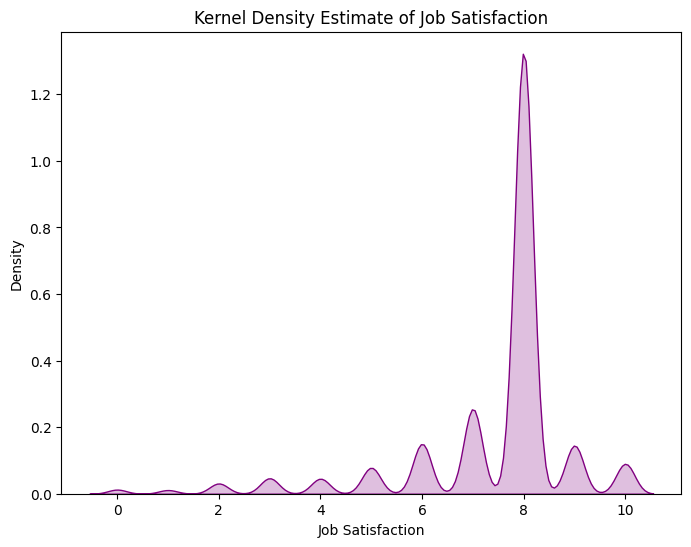

In [7]:
## Write your code here
import matplotlib.pyplot as plt

# Plotting a Pie Chart for JobSat distribution
job_sat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(8, 6))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffb3b3'])
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Hide the y-axis label
plt.show()

import seaborn as sns

# If JobSat is numeric, we can create a KDE plot
# First, we convert JobSat into a numeric value if it's categorical
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Plotting KDE for JobSat distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df['JobSat'].dropna(), shade=True, color='purple')
plt.title('Kernel Density Estimate of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


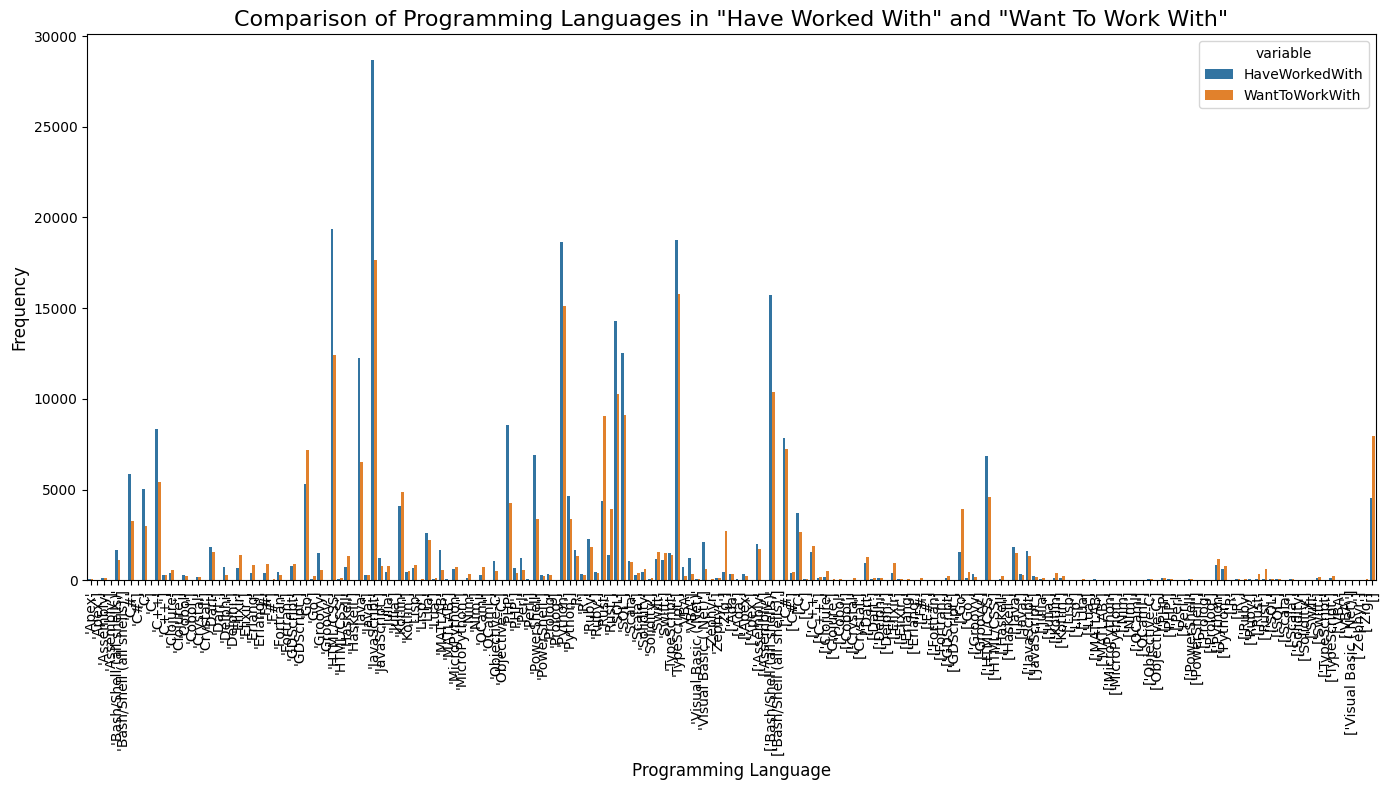

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming df is your DataFrame and the columns 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' exist

# Step 1: Ensure the columns are strings and handle missing values (convert NaN to empty string)
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('').astype(str)
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('').astype(str)

# Step 2: Split the columns into lists of languages
worked_languages = df['LanguageHaveWorkedWith'].str.split(',').explode().str.strip()
want_languages = df['LanguageWantToWorkWith'].str.split(',').explode().str.strip()

# Step 3: Count the frequencies of each language in both columns
worked_counts = Counter(worked_languages)
want_counts = Counter(want_languages)

# Step 4: Convert the counts to DataFrame for easier visualization
worked_df = pd.DataFrame.from_dict(worked_counts, orient='index', columns=['HaveWorkedWith']).reset_index()
worked_df = worked_df.rename(columns={'index': 'Language'})

want_df = pd.DataFrame.from_dict(want_counts, orient='index', columns=['WantToWorkWith']).reset_index()
want_df = want_df.rename(columns={'index': 'Language'})

# Step 5: Merge the two DataFrames on 'Language' to compare both columns
comparison_df = pd.merge(worked_df, want_df, on='Language', how='outer').fillna(0)
comparison_df['HaveWorkedWith'] = comparison_df['HaveWorkedWith'].astype(int)
comparison_df['WantToWorkWith'] = comparison_df['WantToWorkWith'].astype(int)

# Step 6: Prepare data for plotting (melt to long format)
comparison_melted = pd.melt(comparison_df, id_vars=['Language'], value_vars=['HaveWorkedWith', 'WantToWorkWith'])

# Step 7: Plot a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Language', y='value', hue='variable', data=comparison_melted)

# Customize plot
plt.xticks(rotation=90)
plt.title('Comparison of Programming Languages in "Have Worked With" and "Want To Work With"', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()




### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


/tmp/ipykernel_1001/3672613467.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

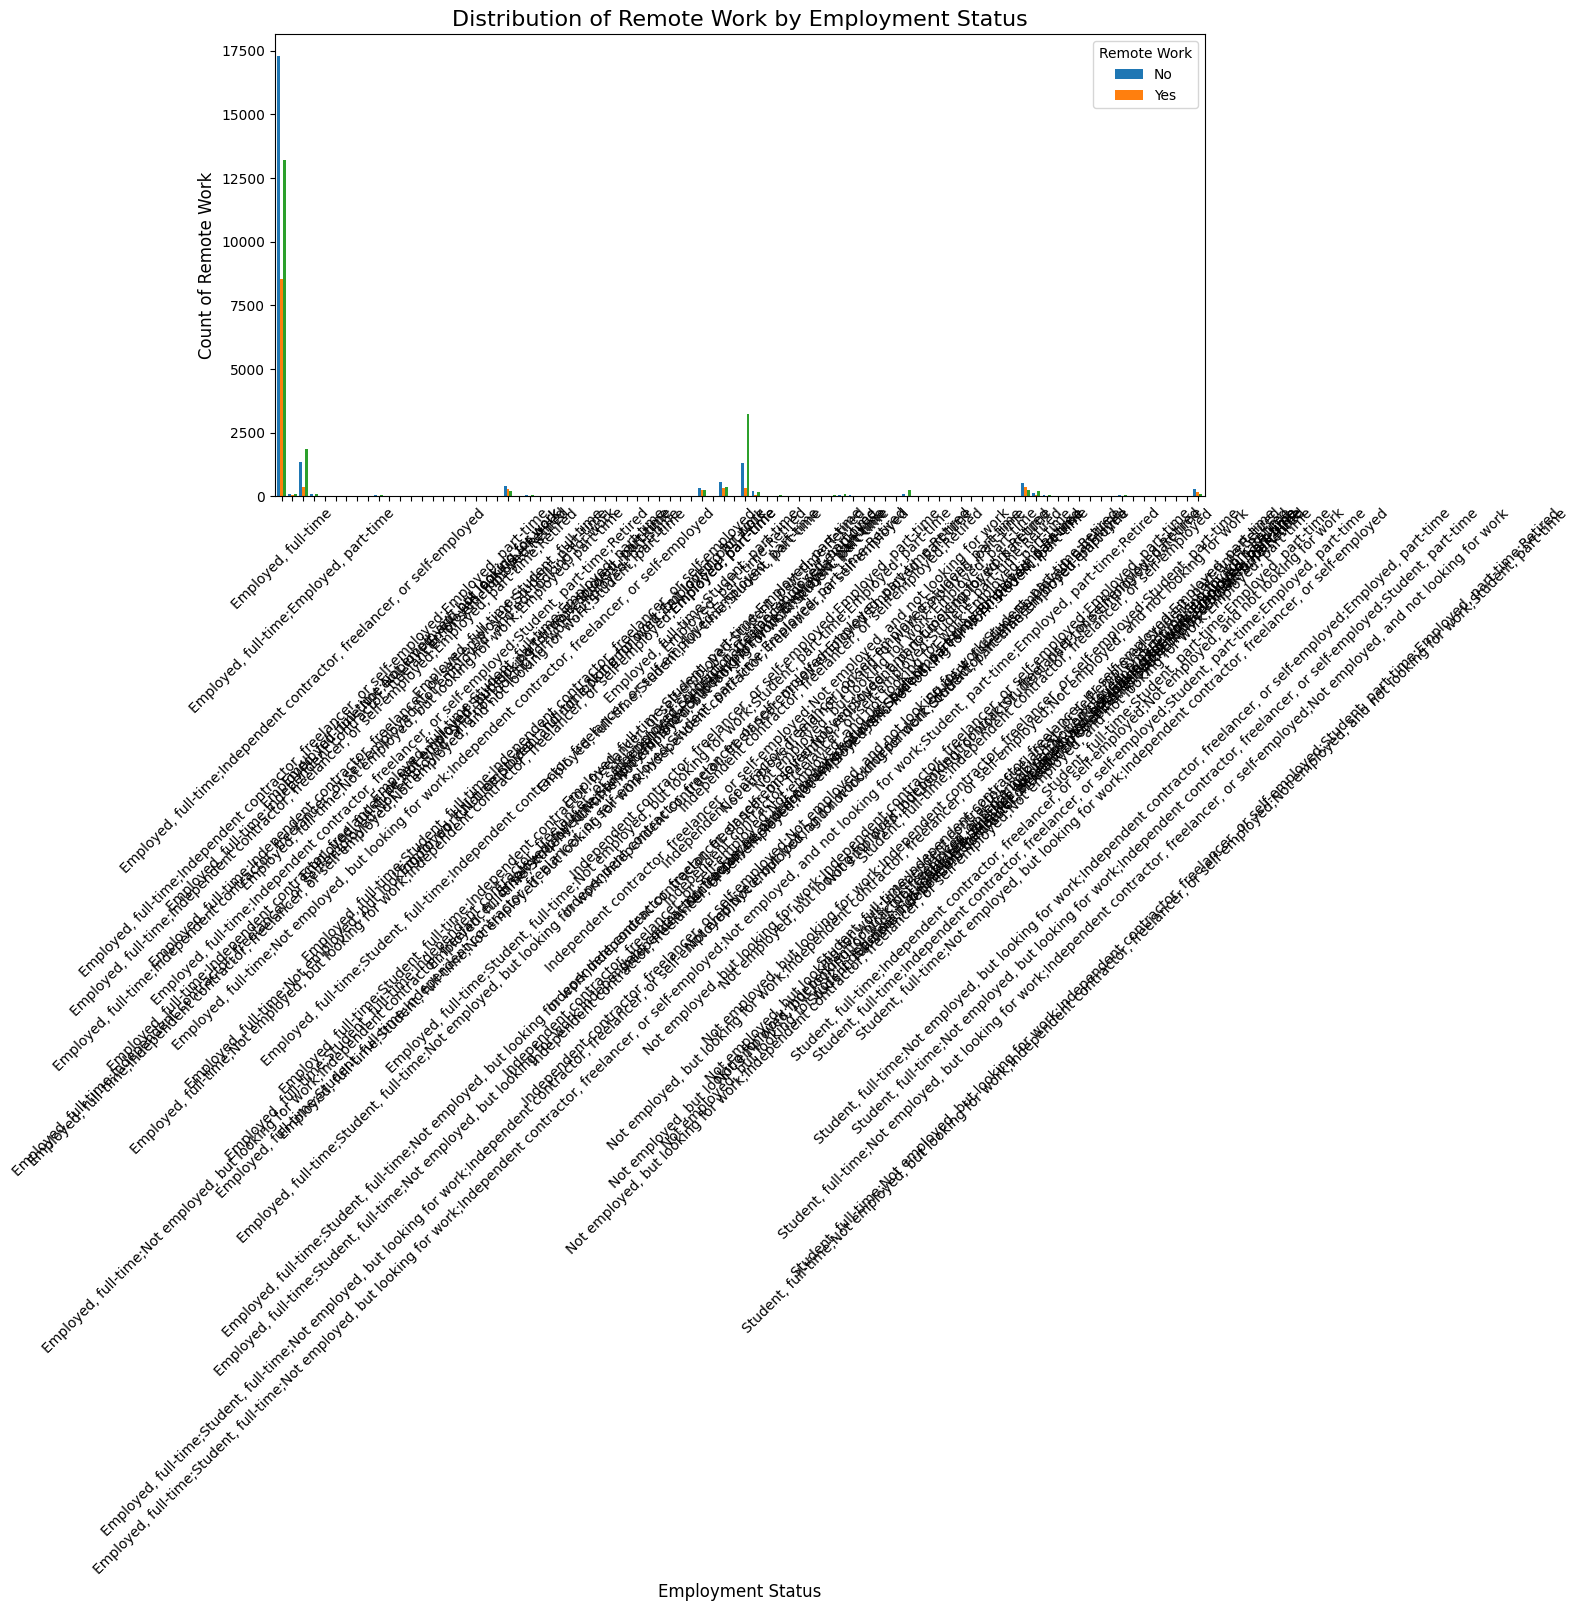

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group the data by Employment and RemoteWork status
# We will count how many people in each employment category work remotely
remote_work_employment = df.groupby(['Employment', 'RemoteWork']).size().unstack().fillna(0)

# Step 2: Create a grouped bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
remote_work_employment.plot(kind='bar', stacked=False, figsize=(12, 6), width=0.8)

# Step 3: Customize the chart
plt.title('Distribution of Remote Work by Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count of Remote Work', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Remote Work', labels=['No', 'Yes'])
plt.show()




### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 73.2 MB/s eta 0:00:00:00:0100:01
Pearson Correlation between JobSat and YearsCodePro: 0.07
Spearman Correlation between JobSat and YearsCodePro: 0.09


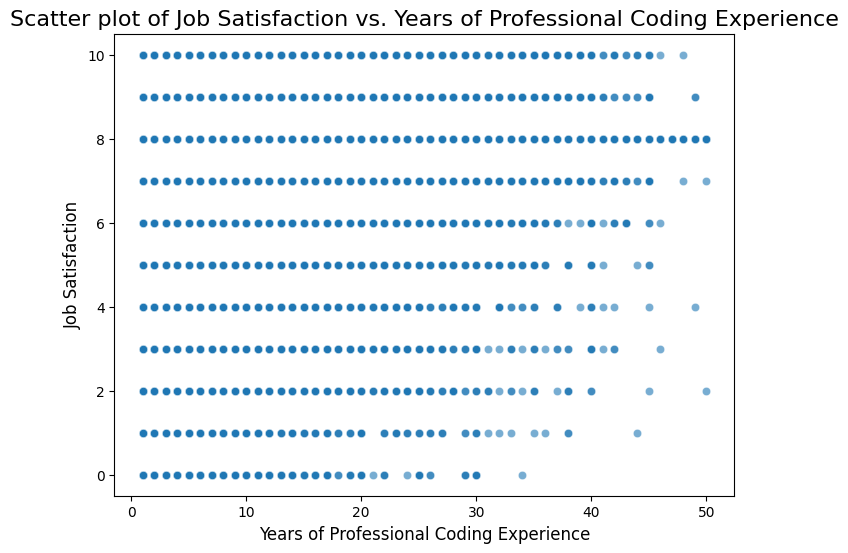

In [19]:
## Write your code here
!pip install scipy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert 'YearsCodePro' and 'JobSat' to numeric values if they are not already
# Ensure that any non-numeric values (e.g., "NaN" or strings) are handled appropriately
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 2: Drop rows where either 'JobSat' or 'YearsCodePro' is missing (optional)
df_cleaned = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 3: Calculate Pearson correlation
pearson_corr = df_cleaned['JobSat'].corr(df_cleaned['YearsCodePro'], method='pearson')

# Step 4: Calculate Spearman correlation
spearman_corr = df_cleaned['JobSat'].corr(df_cleaned['YearsCodePro'], method='spearman')

# Step 5: Output the results
print(f"Pearson Correlation between JobSat and YearsCodePro: {pearson_corr:.2f}")
print(f"Spearman Correlation between JobSat and YearsCodePro: {spearman_corr:.2f}")

# Step 6: Plot the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='YearsCodePro', y='JobSat', alpha=0.6)
plt.title('Scatter plot of Job Satisfaction vs. Years of Professional Coding Experience', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction', fontsize=12)
plt.show()



### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_1001/260071824.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

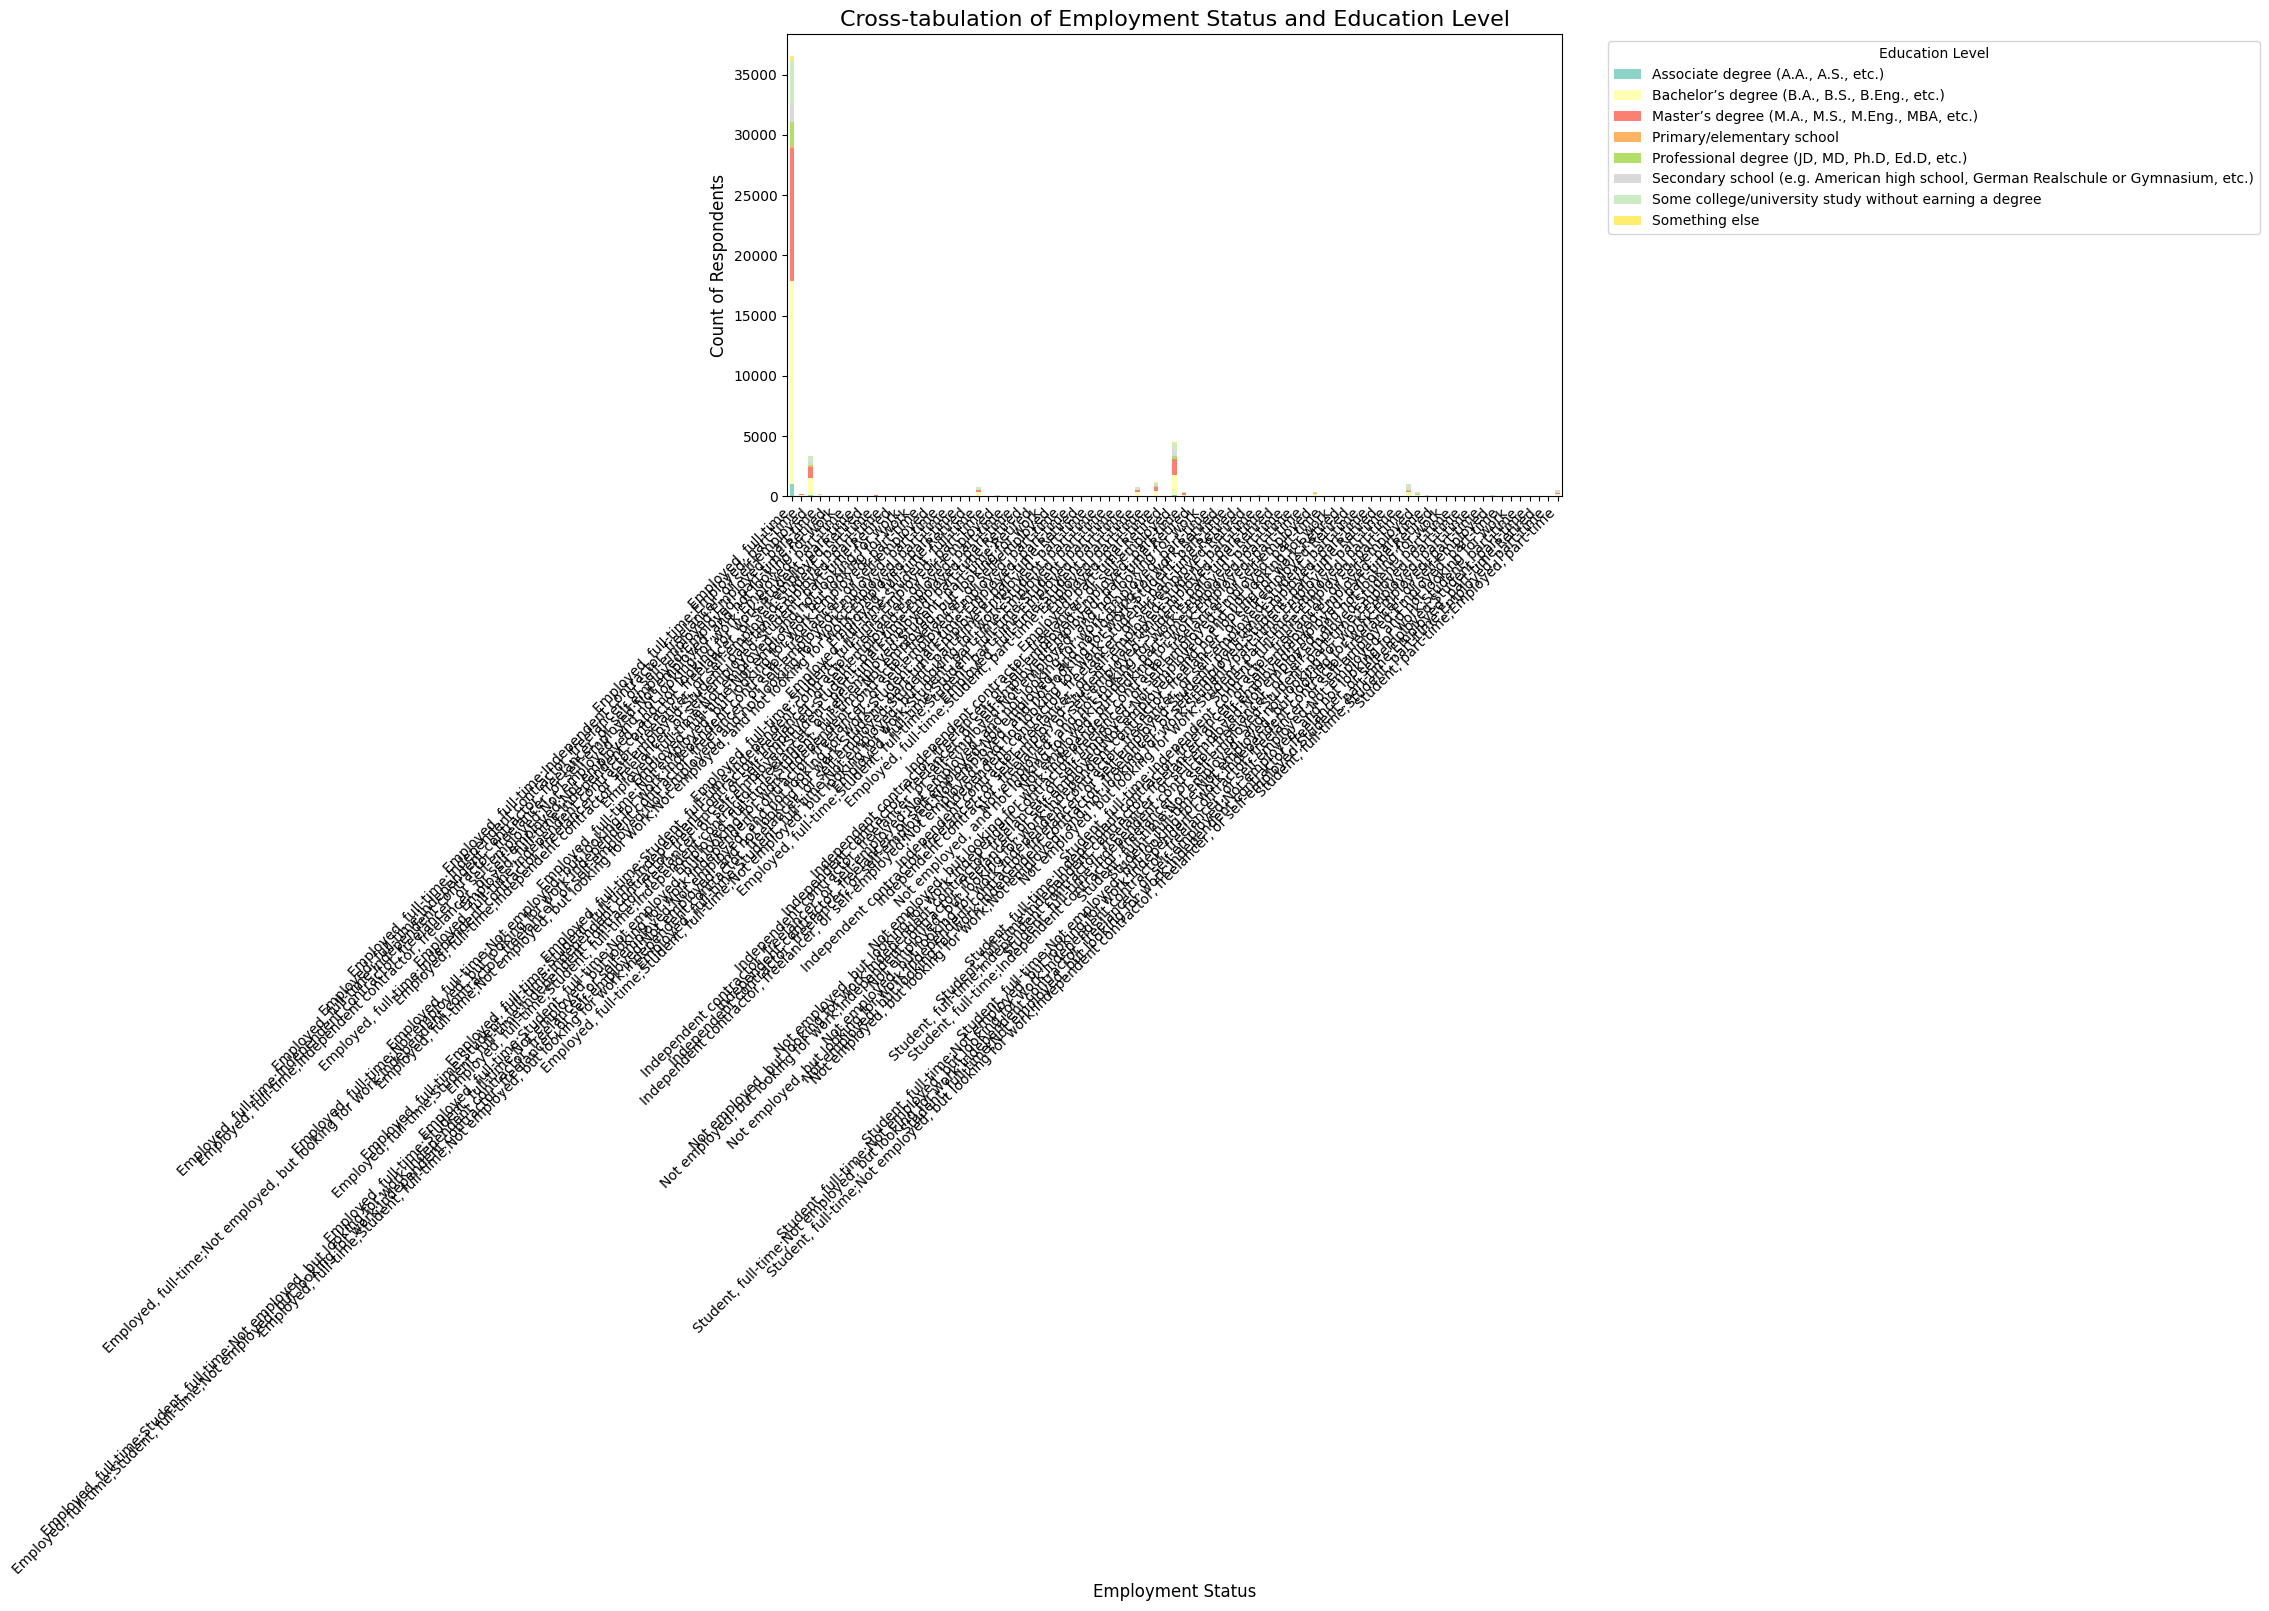

In [20]:
## Write your code here

# Step 1: Create the cross-tabulation table between Employment and EdLevel
employment_education_ct = pd.crosstab(df['Employment'], df['EdLevel'], dropna=True)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(10, 6))
employment_education_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Step 3: Add labels and title
plt.title('Cross-tabulation of Employment Status and Education Level', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: Display the plot
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('cleaned_data.csv', index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
